<a href="https://colab.research.google.com/github/Avadhi-Singhal/MiningNiti/blob/main/APP_REVIEWS_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APP REVIEWS SENTIMENT ANALYSIS
 App Review Sentiment Analysis means evaluating and understanding the sentiments expressed in user reviews of mobile applications

In [ ]:
import pandas as pd
import numpy as na

In [ ]:
df = pd.read_csv("/content/linkedin-reviews - linkedin-reviews.csv")

In [ ]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


#EXPLORATORY DATA ANALYSIS
we will start analysing the distribution of ratings. It will
provide insight into overall sentiments of the reviews. Then we can explore further, such as analyzing the lenght of reviews and, possibly derive insight from the reviews

#  PLOTTING THE DISTRIBUTION OF RATINGS

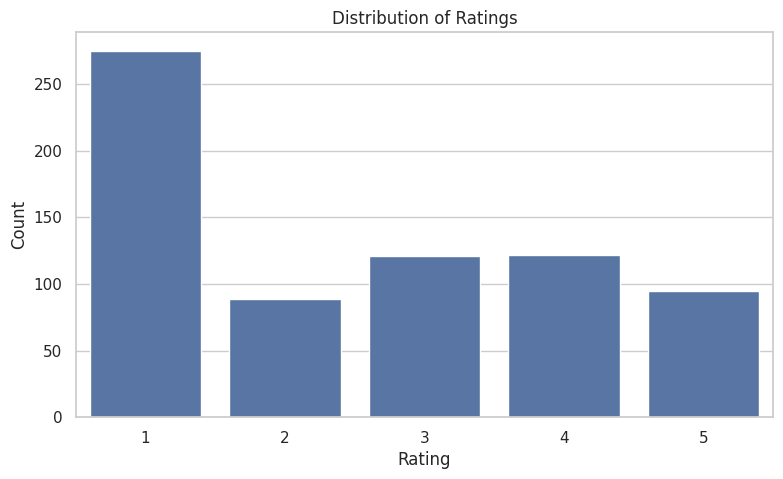

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'Rating')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# ADDING SENTIMENT LABELS IN THE DATA
We will use Textblob library. Textblob provides a polarity score ranging from -1(very negative) to 1(very positive) for a given text. We can use the score to classify each review's sentiment as Positive, Negative or Neutral

In [ ]:
# !pip install textblob
from textblob import TextBlob

In [ ]:
def textblob_sentiment_analysis (Review):
  sentiment = TextBlob(Review).sentiment
  if sentiment.polarity > 0.1:
    return 'Positive'
  elif sentiment.polarity < -0.1:
    return "Negative"
  else:
      return "Neutral"

In [ ]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)


In [ ]:
df.sample(5)

,Review,Rating,Sentiment
364,Latest update is completely broken.,1,Neutral
43,Worked once now keeps crashing,1,Neutral
215,Can't change my profile in the app. No setting...,2,Neutral
463,Was working fine til update. Now force crashes...,3,Positive
511,I just updated my LinkedIn app and I think tha...,5,Positive


# ANALYZING APP REVIEW SENTIMENTS

In [ ]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Positive,298
Neutral,297
Negative,107


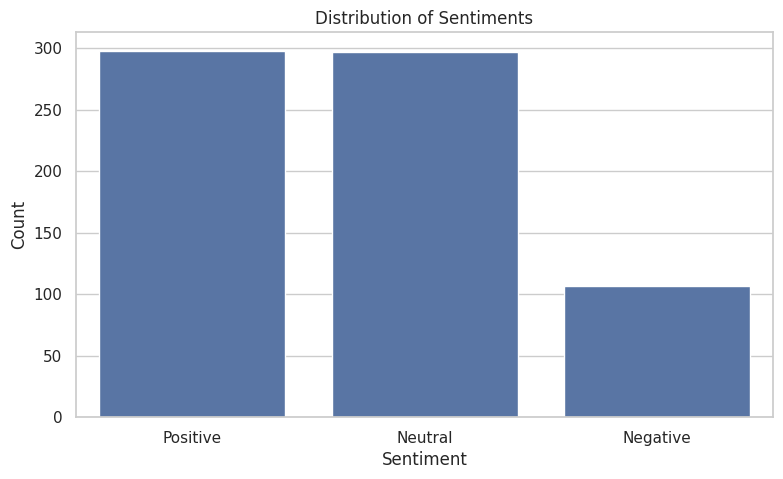

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
            y= sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#So, we can see althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app.

Next, we'll explore the relationship between the sentiments ans the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings

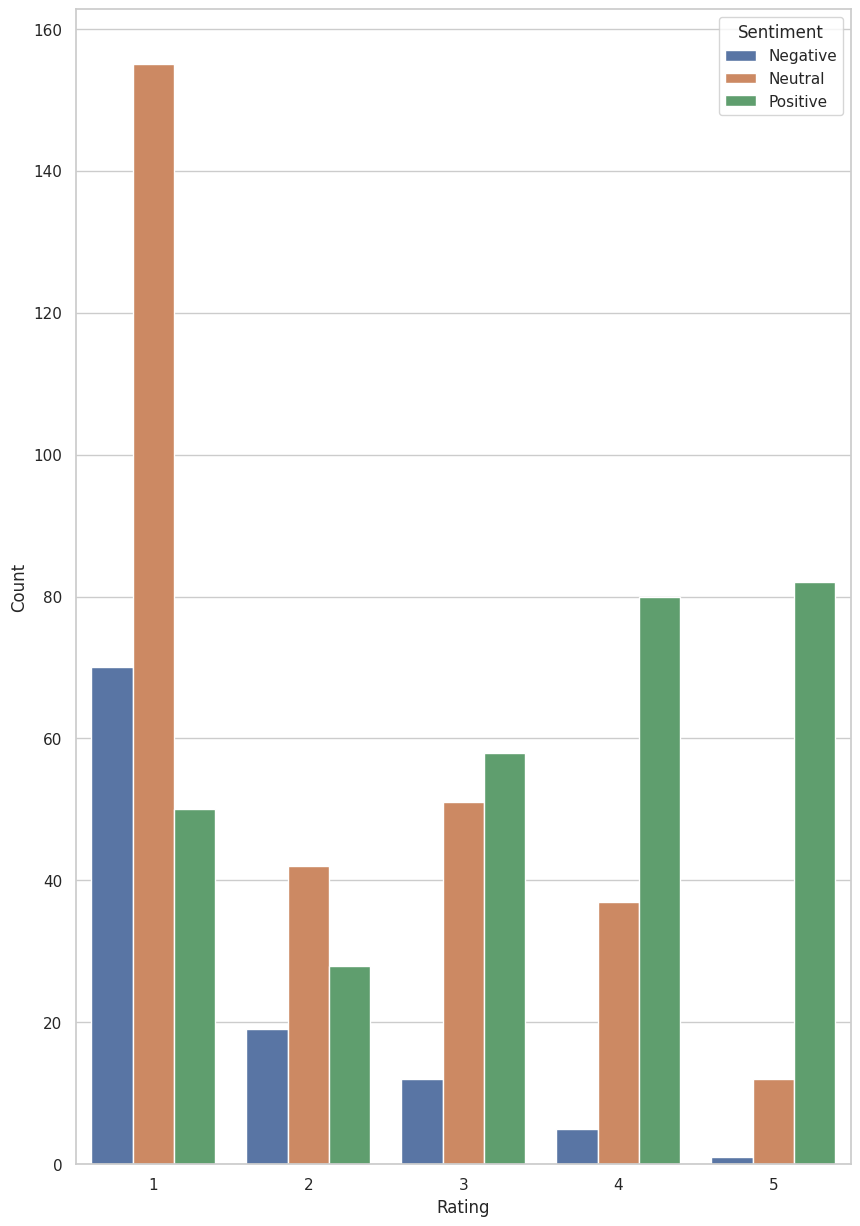

In [ ]:
plt.figure(figsize = (10,15))
sns.countplot(data = df,
              x = 'Rating',
              hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

#Summary
App Reviews Sentiment Analysis is a valuable tool for app developer and business to understand user feedback, prioritize feature updates and maintain a positive usercommunity. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative or neural